### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


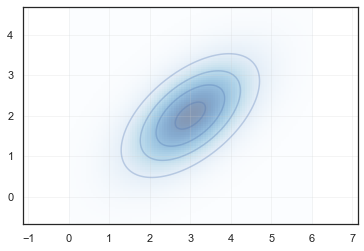

In [1]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100 
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [2]:
## load data as df
df_columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio', 'liver_patient']
# 1. Age - Age of the patient
# 2. Gender - Gender of the patient
# 3. TB - Total Bilirubin
# 4. DB - Direct Bilirubin
# 5. Alkphos - Alkaline Phosphotase
# 6. Sgpt - Alamine Aminotransferase
# 7. Sgot - Aspartate Aminotransferase
# 8. TP - Total Protiens
# 9. ALB - Albumin
# 10. A/G Ratio - Albumin and Globulin Ratio
# 11. Selector field - used to split the data into two sets


liverData = pd.read_csv(r'C:\Users\alexg\Documents\Masters degree IDC\Statiscs and data anlysis\IndianLiverResearch\Indian_Liver_Patient_Dataset_(ILPD).csv',
                        names=df_columns, index_col=False)
#liver_df = pd.DataFrame(liverData, columns=df_columns)
print(liverData)
liverData.head()
## dealing with missing values

#before the "filling"
#print(liverData.isnull().sum())

liverDataFilledWithMedian = liverData.fillna(liverData.median())
#After the filling
#print(liverDataFilledWithMedian.isnull().sum())

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AG_Ratio  \
0     65  Female   0.7  0.1      187    16    18  6.8  3.3      0.90   
1     62    Male  10.9  5.5      699    64   100  7.5  3.2      0.74   
2     62    Male   7.3  4.1      490    60    68  7.0  3.3      0.89   
3     58    Male   1.0  0.4      182    14    20  6.8  3.4      1.00   
4     72    Male   3.9  2.0      195    27    59  7.3  2.4      0.40   
..   ...     ...   ...  ...      ...   ...   ...  ...  ...       ...   
578   60    Male   0.5  0.1      500    20    34  5.9  1.6      0.37   
579   40    Male   0.6  0.1       98    35    31  6.0  3.2      1.10   
580   52    Male   0.8  0.2      245    48    49  6.4  3.2      1.00   
581   31    Male   1.3  0.5      184    29    32  6.8  3.4      1.00   
582   38    Male   1.0  0.3      216    21    24  7.3  4.4      1.50   

     liver_patient  
0                1  
1                1  
2                1  
3                1  
4                1  
..       

In [3]:
np.unique(liverDataFilledWithMedian['liver_patient'], return_counts=True)

(array([1, 2], dtype=int64), array([416, 167], dtype=int64))

"1"  counts liver_patient positive = liver patient 416 samples

"2" the rest, non liver patient 167 samples

In [4]:
## Using confidence intervals determine features for which you can state with confidence of 95% that 
# the healthy population mean is larger/smaller than the disease population mean.

healthy = liverDataFilledWithMedian[liverDataFilledWithMedian['liver_patient']==2]
disease = liverDataFilledWithMedian[liverDataFilledWithMedian['liver_patient']==1]

healthySamplesAggregated = healthy[['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']].agg(['mean', 'std', 'count']).T
diseaseSamplesAggregated = disease[['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']].agg(['mean', 'std', 'count']).T
print(healthySamplesAggregated)

healthySamplesAggregated['sigmaDevSqrtN'] = healthySamplesAggregated['std']/np.sqrt(healthySamplesAggregated['count'])
healthySamplesAggregated['Low95Interval'] = healthySamplesAggregated['mean']-1.96*healthySamplesAggregated['sigmaDevSqrtN']
healthySamplesAggregated['High95Interval'] = healthySamplesAggregated['mean']+1.96*healthySamplesAggregated['sigmaDevSqrtN']

diseaseSamplesAggregated['sigmaDevSqrtN'] = diseaseSamplesAggregated['std']/np.sqrt(diseaseSamplesAggregated['count'])
diseaseSamplesAggregated['Low95Interval'] = diseaseSamplesAggregated['mean']-1.96*diseaseSamplesAggregated['sigmaDevSqrtN']
diseaseSamplesAggregated['High95Interval'] = diseaseSamplesAggregated['mean']+1.96*diseaseSamplesAggregated['sigmaDevSqrtN']

liverDataFilledWithMedian.groupby('liver_patient').agg(['mean', 'std'])

                mean         std  count
Age        41.239521   16.999366  167.0
TB          1.142515    1.004472  167.0
DB          0.396407    0.519255  167.0
Alkphos   219.754491  140.986262  167.0
Sgpt       33.652695   25.060392  167.0
Sgot       40.688623   36.411620  167.0
TP          6.543114    1.063042  167.0
ALB         3.344311    0.783690  167.0
AG_Ratio    1.028383    0.285723  167.0


Age                   TB                  DB            \
                    mean        std      mean       std      mean       std   
liver_patient                                                                 
1              46.153846  15.654412  4.164423  7.144831  1.923558  3.206901   
2              41.239521  16.999366  1.142515  1.004472  0.396407  0.519255   

                  Alkphos                   Sgpt                    Sgot  \
                     mean         std       mean         std        mean   
liver_patient                                                              
1              319.007212  268.307911  99.605769  212.768472  137.699519   
2              219.754491  140.986262  33.652695   25.060392   40.688623   

                                TP                 ALB            AG_Ratio  \
                     std      mean       std      mean       std      mean   
liver_patient                                                                
1              337.38998  6.459135  1.094659  3.060577  0.786595  0.914255   
2               36.41162  6.543114  1.063042  3.344311  0.783690  1.028383   

                         
                    std  
liver_patient            
1              0.325368  
2              0.285723

In [5]:
healthySamplesAggregated

,mean,std,count,sigmaDevSqrtN,Low95Interval,High95Interval
Age,41.239521,16.999366,167.0,1.315450,38.661238,43.817804
TB,1.142515,1.004472,167.0,0.077728,0.990167,1.294863
DB,0.396407,0.519255,167.0,0.040181,0.317652,0.475162
Alkphos,219.754491,140.986262,167.0,10.909845,198.371196,241.137786
Sgpt,33.652695,25.060392,167.0,1.939231,29.851801,37.453588
Sgot,40.688623,36.411620,167.0,2.817616,35.166096,46.211150
TP,6.543114,1.063042,167.0,0.082261,6.381883,6.704345
ALB,3.344311,0.783690,167.0,0.060644,3.225450,3.463173
AG_Ratio,1.028383,0.285723,167.0,0.022110,0.985048,1.071719


In [6]:
diseaseSamplesAggregated

,mean,std,count,sigmaDevSqrtN,Low95Interval,High95Interval
Age,46.153846,15.654412,416.0,0.767521,44.649506,47.658187
TB,4.164423,7.144831,416.0,0.350304,3.477827,4.851019
DB,1.923558,3.206901,416.0,0.157231,1.615384,2.231731
Alkphos,319.007212,268.307911,416.0,13.154878,293.223651,344.790772
Sgpt,99.605769,212.768472,416.0,10.431833,79.159377,120.052161
Sgot,137.699519,337.389980,416.0,16.541905,105.277386,170.121653
TP,6.459135,1.094659,416.0,0.053670,6.353941,6.564328
ALB,3.060577,0.786595,416.0,0.038566,2.984988,3.136166
AG_Ratio,0.914255,0.325368,416.0,0.015952,0.882988,0.945522


In [7]:
# Going through the data to check if the 95% CI intersect\overlap between each data set.
# If there's no overlapping - then you can say with 95% confidence that the means are smaller \ larger
# Means that larger in healthy (non liver patients)  with a 95% confidence:

In [8]:
for ind in diseaseSamplesAggregated.index:
    if( healthySamplesAggregated.loc[ind]['mean'] > diseaseSamplesAggregated.loc[ind]['mean']):
        if(healthySamplesAggregated.loc[ind]['Low95Interval'] > diseaseSamplesAggregated.loc[ind]['High95Interval']):
            print(ind)


ALB
AG_Ratio


In [9]:
# Means that smaller in healty (non liver patients) with a 95% confidence: 

for ind in diseaseSamplesAggregated.index:
    if( healthySamplesAggregated.loc[ind]['mean'] < diseaseSamplesAggregated.loc[ind]['mean']):
        if(healthySamplesAggregated.loc[ind]['High95Interval'] < diseaseSamplesAggregated.loc[ind]['Low95Interval']):
            print(ind)

Age
TB
DB
Alkphos
Sgpt
Sgot


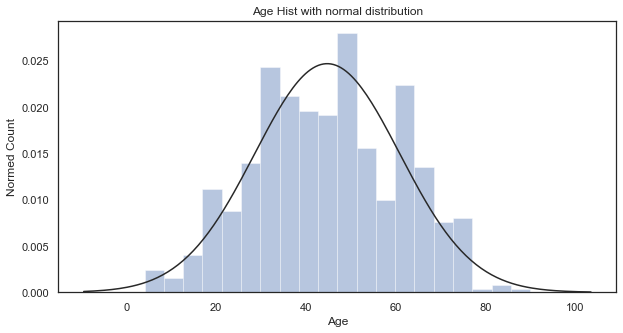

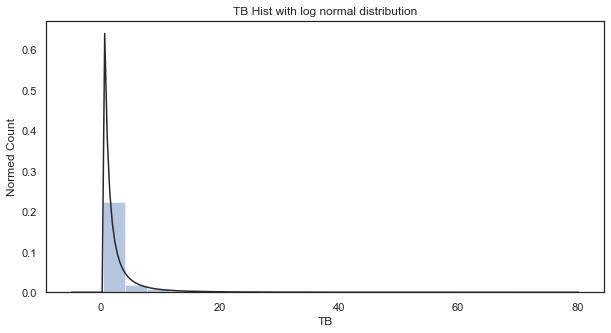

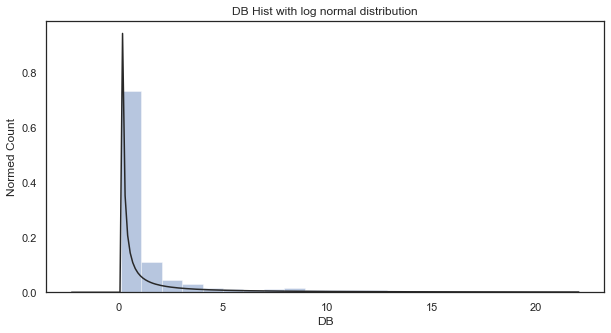

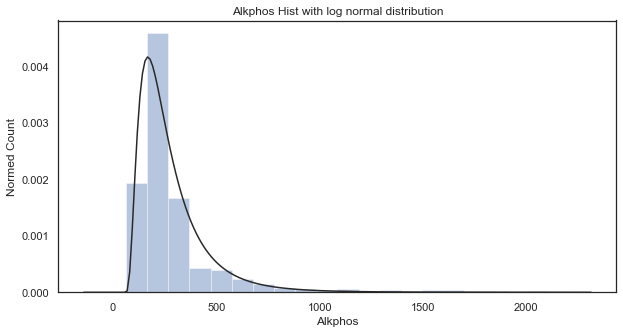

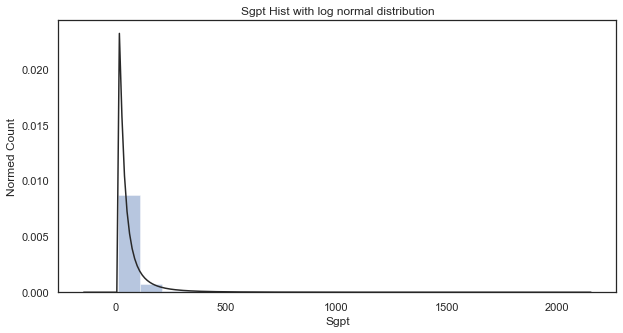

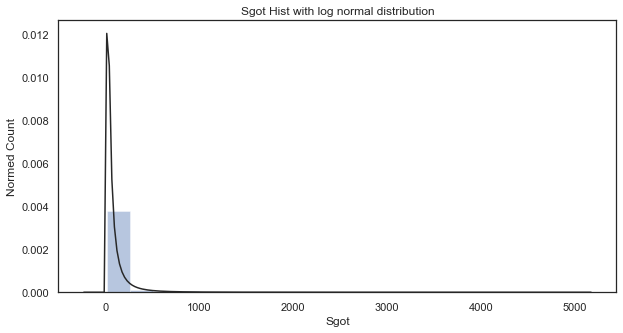

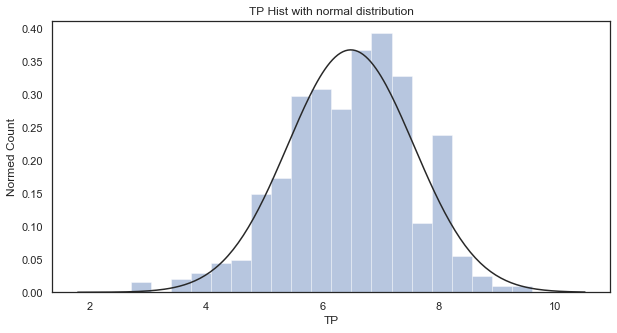

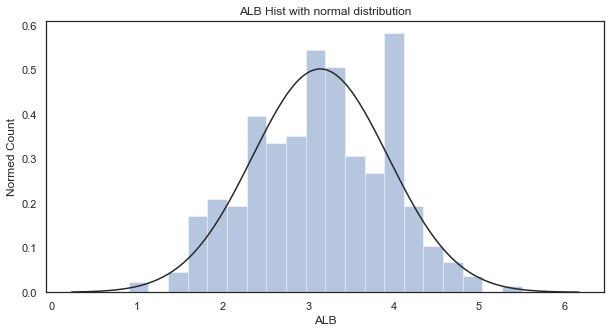

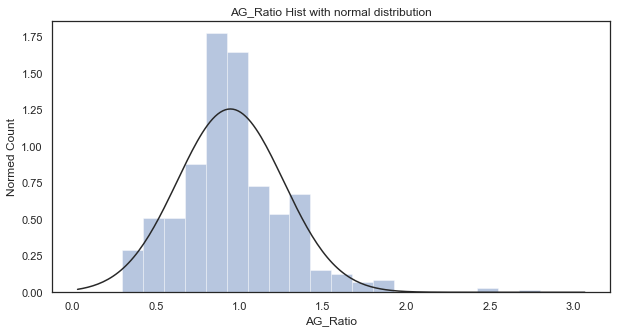

In [10]:
histColumns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']
liverDataAggregated = liverDataFilledWithMedian[histColumns].agg(['sum','mean', 'std', 'count','var','max', 'min']).T
#number of samples
n = liverDataAggregated['count']['Age']
print()
#sumColumns = liverDataFilledWithMedian.sum()
#sumColumns
for column in histColumns:    
    plt.figure(figsize=(10,5))
    
    if column in ['Age', 'TP', 'ALB', 'AG_Ratio']:
        sns.distplot(liverDataFilledWithMedian[column], fit=scipy.stats.norm, kde=False,bins=20)
        plt.title('{} Hist with normal distribution'.format(column))
    else:
        sns.distplot(liverDataFilledWithMedian[column],fit=scipy.stats.lognorm,kde=False,bins=20)
        plt.title('{} Hist with log normal distribution'.format(column))
    
    plt.xlabel('{}'.format(column))
    plt.ylabel('Normed Count')


Diseases only significant correlation between:TB and DB corrVal: 0.8746179301164131


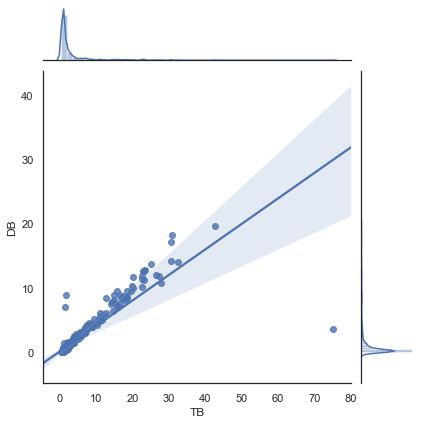

In [11]:
#Prinitng the correaltion matrix for the data:
valueDf = liverDataFilledWithMedian.rename_axis('ID').values



listOfVectors =[]
listOfColumnNames = []
for (columnName, columnData) in liverDataFilledWithMedian.iteritems():
    columnVector = liverDataFilledWithMedian[columnName].to_numpy()
    if(columnName == 'Gender'):
        #indexing females as 0 and male as 1 to create correaltion matrix
        stringVectorReplacedWithFloats = []
        for val in columnVector:
            if (val == 'Female'):
                stringVectorReplacedWithFloats.append(0.)
            else:
                stringVectorReplacedWithFloats.append(1.)
        columnVector = np.array(stringVectorReplacedWithFloats)
    listOfColumnNames.append(columnName)
    listOfVectors.append(columnVector)

corrThreshold = 0.8
corrMat = np.corrcoef(listOfVectors)
valuesWithSuggnificantCorr = []
d = len(corrMat[0])
for i in range(d):
    for j in range(d):
        if abs(corrMat[i][j]) > corrThreshold :
            if(i != j):
                if(not (listOfColumnNames[j],listOfColumnNames[i]) in valuesWithSuggnificantCorr):
                    corr, pVal = scipy.stats.pearsonr(liverDataFilledWithMedian[listOfColumnNames[i]],liverDataFilledWithMedian[listOfColumnNames[j]])
                    if(pVal < 0.01):
                        print(f"Diseases only significant correlation between:{listOfColumnNames[i]} and {listOfColumnNames[j]} corrVal: {corrMat[i][j]}")
                        valuesWithSuggnificantCorr.append((listOfColumnNames[i],listOfColumnNames[j]))                    

for corrVals in valuesWithSuggnificantCorr:
    dataFrameToJoinPlot = liverDataFilledWithMedian[[corrVals[0], corrVals[1]]]
    sns.jointplot(x=corrVals[0], y=corrVals[1], data=dataFrameToJoinPlot, kind="reg")
    #plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


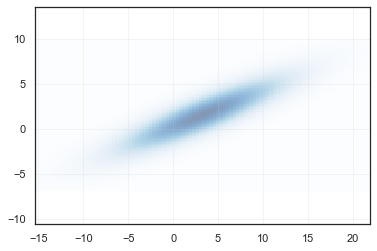

In [12]:
#Finding bivariate normal pdfs:
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100 
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

covMatTotal = liverDataFilledWithMedian.cov()
for corrVals in valuesWithSuggnificantCorr:     
    val1 = corrVals[0]
    val2 = corrVals[1]
    mu1 = liverDataAggregated['mean'][val1]
    mu2 = liverDataAggregated['mean'][val2]
    means = [mu1, mu2]
    covarianceBetweenVals = covMatTotal[val1][val2]
    variance1 = covMatTotal[val1][val1]
    variance2 = covMatTotal[val2][val2]
    cov = [[variance1, covarianceBetweenVals], [covarianceBetweenVals, variance2]]
    plot_2d_Gaussian_pdf(means, cov)
    

In [13]:
# Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? 
# Can you graphically represent this?

#checking Segnificant correaltion in males only
listOfVectors = []
listOfColumnNames = []
liverDataMaleOnly = liverDataFilledWithMedian[liverDataFilledWithMedian['Gender']=='Male']


for (columnName, columnData) in liverDataMaleOnly.iteritems():
    columnVector = liverDataMaleOnly[columnName].to_numpy()
    if(columnName == 'Gender'):
        stringVectorReplacedWithFloats = []
        for val in columnVector:
            if (val == 'Female'):
                stringVectorReplacedWithFloats.append(0.)
            else:
                stringVectorReplacedWithFloats.append(1.)
        columnVector = np.array(stringVectorReplacedWithFloats)
    listOfColumnNames.append(columnName)
    listOfVectors.append(columnVector)
corrMat = np.corrcoef(listOfVectors)
valuesWithSuggnificantCorrMales = []
d = len(corrMat[0])
for i in range(d):
    for j in range(d):
        if abs(corrMat[i][j]) > corrThreshold :
            if(i!=j):
                if(not (listOfColumnNames[j],listOfColumnNames[i]) in valuesWithSuggnificantCorrMales):
                    corr, pVal = scipy.stats.pearsonr(liverDataFilledWithMedian[listOfColumnNames[i]],liverDataFilledWithMedian[listOfColumnNames[j]])
                    if(pVal < 0.01):
                        print(f"Males only significant correlation between:{listOfColumnNames[i]} and {listOfColumnNames[j]} corrVal: {corrMat[i][j]}")
                        valuesWithSuggnificantCorrMales.append((listOfColumnNames[i],listOfColumnNames[j]))
print(valuesWithSuggnificantCorrMales)

#checking Segnificant correaltion in females only
listOfVectors = []
listOfColumnNames = []
liverDataFemaleOnly = liverDataFilledWithMedian[liverDataFilledWithMedian['Gender']=='Female']
for (columnName, columnData) in liverDataFemaleOnly.iteritems():
    columnVector = liverDataFemaleOnly[columnName].to_numpy()
    if(columnName == 'Gender'):
        stringVectorReplacedWithFloats = []
        for val in columnVector:
            if (val == 'Female'):
                stringVectorReplacedWithFloats.append(0.)
            else:
                stringVectorReplacedWithFloats.append(1.)
        columnVector = np.array(stringVectorReplacedWithFloats)
    listOfColumnNames.append(columnName)
    listOfVectors.append(columnVector)
corrMat = np.corrcoef(listOfVectors)
valuesWithSuggnificantCorrFemales = []
d = len(corrMat[0])
for i in range(d):
    for j in range(d):
        if abs(corrMat[i][j]) > corrThreshold :
            if(i != j):
                if(not (listOfColumnNames[j],listOfColumnNames[i]) in valuesWithSuggnificantCorrFemales):
                    corr, pVal = scipy.stats.pearsonr(liverDataFilledWithMedian[listOfColumnNames[i]],liverDataFilledWithMedian[listOfColumnNames[j]])
                    if(pVal < 0.01):
                        print(f"Females only: significant correlation between:{listOfColumnNames[i]} and {listOfColumnNames[j]} corrVal: {corrMat[i][j]}")
                        valuesWithSuggnificantCorrFemales.append((listOfColumnNames[i],listOfColumnNames[j]))
print(valuesWithSuggnificantCorrFemales)

Males only significant correlation between:TB and DB corrVal: 0.8516104300292366
[('TB', 'DB')]
Females only: significant correlation between:TB and DB corrVal: 0.9896173622879266
Females only: significant correlation between:Sgpt and Sgot corrVal: 0.9432068523716429
Females only: significant correlation between:TP and ALB corrVal: 0.8659669167744891
[('TB', 'DB'), ('Sgpt', 'Sgot'), ('TP', 'ALB')]


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Values that correlate in females but not in males: 'Sgpt' & 'Sgot', 'TP' & 'ALB'
Graphicaly representing the above pair male vs females:

Female only Sgpt vs Sgot

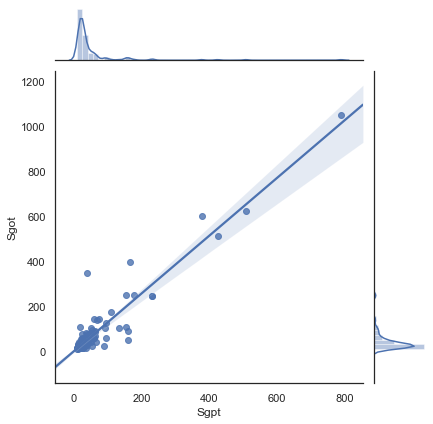

In [14]:
dataFrameToJoinPlot = liverDataFemaleOnly[['Sgpt', 'Sgot']]
sns.jointplot(x='Sgpt', y='Sgot', data=dataFrameToJoinPlot, kind="reg")


Male only Sgpt vs Sgot

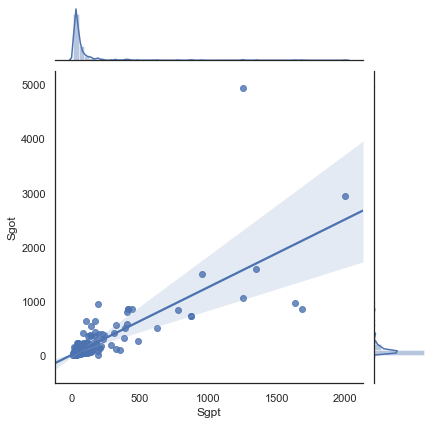

In [15]:
dataFrameToJoinPlot = liverDataMaleOnly[['Sgpt', 'Sgot']]
sns.jointplot(x='Sgpt', y='Sgot', data=dataFrameToJoinPlot, kind="reg")

Female only TP vs ALB

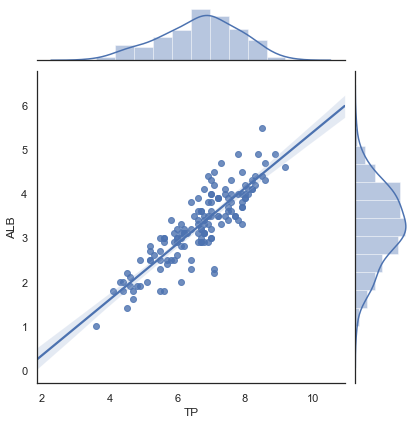

In [16]:
dataFrameToJoinPlot = liverDataFemaleOnly[['TP', 'ALB']]
sns.jointplot(x='TP', y='ALB', data=dataFrameToJoinPlot, kind="reg")


Male only TP vs ALB

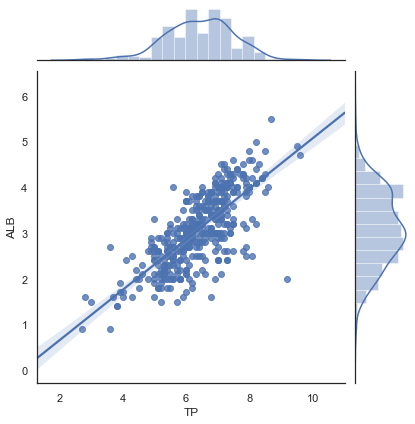

In [17]:
dataFrameToJoinPlot = liverDataMaleOnly[['TP', 'ALB']]
sns.jointplot(x='TP', y='ALB', data=dataFrameToJoinPlot, kind="reg")

Checking if there are different correlation pairs in healthy or liver paitents

Checking if healthy or diseased paitents have different correaltion values
healthy patients:

In [18]:
listOfVectors = []
listOfColumnNames = []
for (columnName, columnData) in healthy.iteritems():
    columnVector = healthy[columnName].to_numpy()
    if(columnName == 'Gender'):
        stringVectorReplacedWithFloats = []
        for val in columnVector:
            if (val == 'Female'):
                stringVectorReplacedWithFloats.append(0.)
            else:
                stringVectorReplacedWithFloats.append(1.)
        columnVector = np.array(stringVectorReplacedWithFloats)
    listOfColumnNames.append(columnName)
    listOfVectors.append(columnVector)
corrMat = np.corrcoef(listOfVectors)
valuesWithSuggnificantCorrHealthys = []
d = len(corrMat[0])
for i in range(d):
    for j in range(d):
        if abs(corrMat[i][j]) > corrThreshold :
            if(i != j):
                if(not (listOfColumnNames[j],listOfColumnNames[i]) in valuesWithSuggnificantCorrHealthys):
                    corr, pVal = scipy.stats.pearsonr(liverDataFilledWithMedian[listOfColumnNames[i]],liverDataFilledWithMedian[listOfColumnNames[j]])
                    if(pVal < 0.01):
                        print(f"Healthys only: significant correlation between:{listOfColumnNames[i]} and {listOfColumnNames[j]} corrVal: {corrMat[i][j]}")
                        valuesWithSuggnificantCorrHealthys.append((listOfColumnNames[i],listOfColumnNames[j]))
print(valuesWithSuggnificantCorrHealthys)

Healthys only: significant correlation between:TB and DB corrVal: 0.9861831010591809
Healthys only: significant correlation between:TP and ALB corrVal: 0.8636759829549547
[('TB', 'DB'), ('TP', 'ALB')]


In [19]:
#liver patients
listOfVectors = []
listOfColumnNames = []

for (columnName, columnData) in disease.iteritems():
    columnVector = disease[columnName].to_numpy()
    if(columnName == 'Gender'):
        stringVectorReplacedWithFloats = []
        for val in columnVector:
            if (val == 'Female'):
                stringVectorReplacedWithFloats.append(0.)
            else:
                stringVectorReplacedWithFloats.append(1.)
        columnVector = np.array(stringVectorReplacedWithFloats)
    listOfColumnNames.append(columnName)
    listOfVectors.append(columnVector)
corrMat = np.corrcoef(listOfVectors)
valuesWithSuggnificantCorrDiseases = []
d = len(corrMat[0])
for i in range(d):
    for j in range(d):
        if abs(corrMat[i][j]) > corrThreshold :
            if(i != j):
                if(not (listOfColumnNames[j],listOfColumnNames[i]) in valuesWithSuggnificantCorrDiseases):
                    print(f"Diseases only: significant correlation between:{listOfColumnNames[i]} and {listOfColumnNames[j]} corrVal: {corrMat[i][j]}")
                    corr, pVal = scipy.stats.pearsonr(liverDataFilledWithMedian[listOfColumnNames[i]],liverDataFilledWithMedian[listOfColumnNames[j]])
                    if(pVal < 0.01):
                        valuesWithSuggnificantCorrDiseases.append((listOfColumnNames[i],listOfColumnNames[j]))
print(valuesWithSuggnificantCorrDiseases)

Diseases only: significant correlation between:TB and DB corrVal: 0.8667592372615996
[('TB', 'DB')]


we can see that ('TP', 'ALB') correlate in healthy paitents but do not correalte in liver paitents.

Representing graphfically the differnce in correlation in these values between liver paitents and non liver paitents:

Healthy paitents:('TP', 'ALB') 

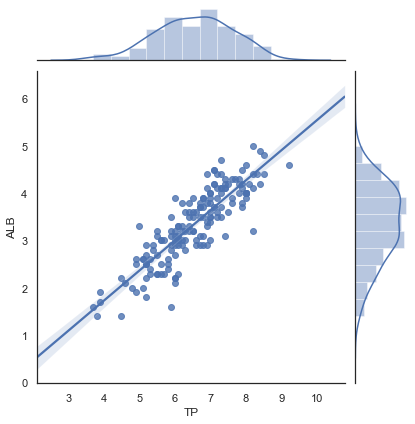

In [20]:
dataFrameToJoinPlot = healthy[['TP', 'ALB']]
sns.jointplot(x='TP', y='ALB', data=dataFrameToJoinPlot, kind="reg")

Liver paitents: ('TP', 'ALB')

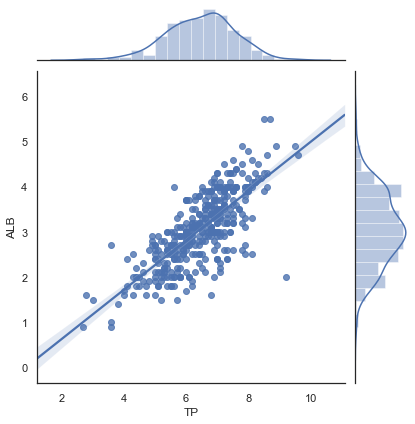

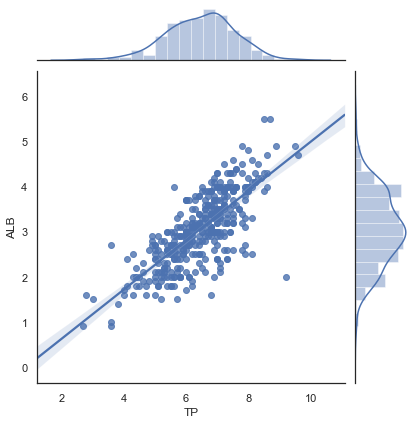

In [32]:
dataFrameToJoinPlot = disease[['TP', 'ALB']]
sns.jointplot(x='TP', y='ALB', data=dataFrameToJoinPlot, kind="reg")


In [24]:
# For each numerical feature, except age, plot the distribution for this feature against bins of age. 
# In each bin provide a split violin plot, with different colors for healthy and disease.

4 90


(array([ 10.,  38.,  57., 114.,  97., 109.,  81.,  53.,  21.,   3.]),
 array([ 4. , 12.6, 21.2, 29.8, 38.4, 47. , 55.6, 64.2, 72.8, 81.4, 90. ]),
 <a list of 10 Patch objects>)

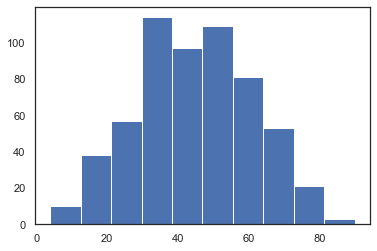

In [25]:
print(np.min(liverDataFilledWithMedian['Age']), np.max(liverDataFilledWithMedian['Age']))
plt.hist(liverDataFilledWithMedian['Age'])

In [26]:
# Age binning
# bins = [0, 10,20,30,40,50,60,70,80,90]
# labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
bins = [0,20,40,60,80,100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
liverDataFilledWithMedian['binned_age'] = pd.cut(liverDataFilledWithMedian['Age'], bins=bins, labels=labels)
liverDataFilledWithMedian.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,liver_patient,binned_age
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,60-80
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,60-80
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,60-80
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,40-60
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,60-80


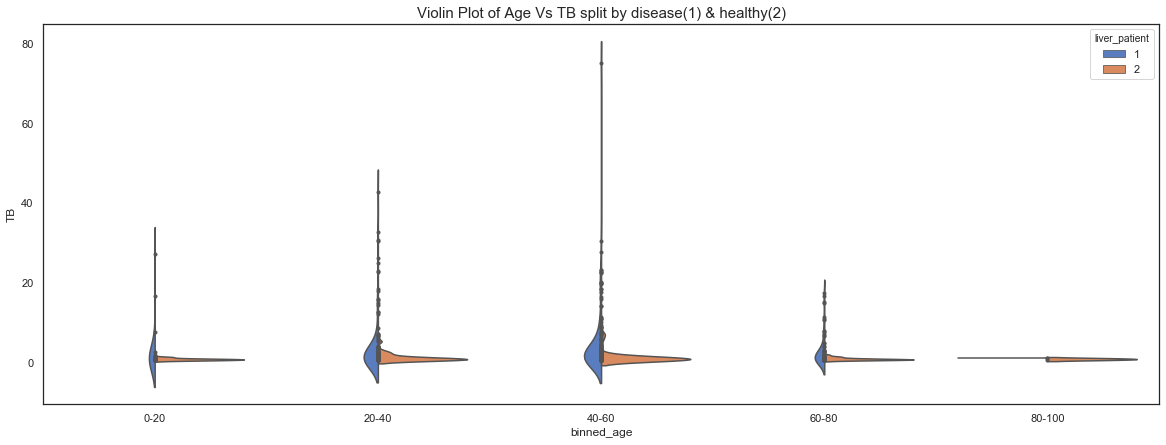

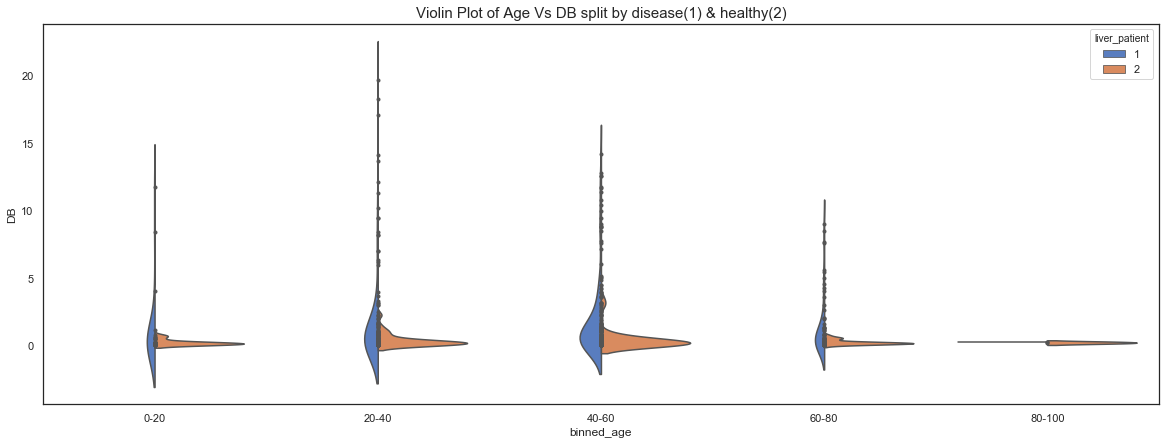

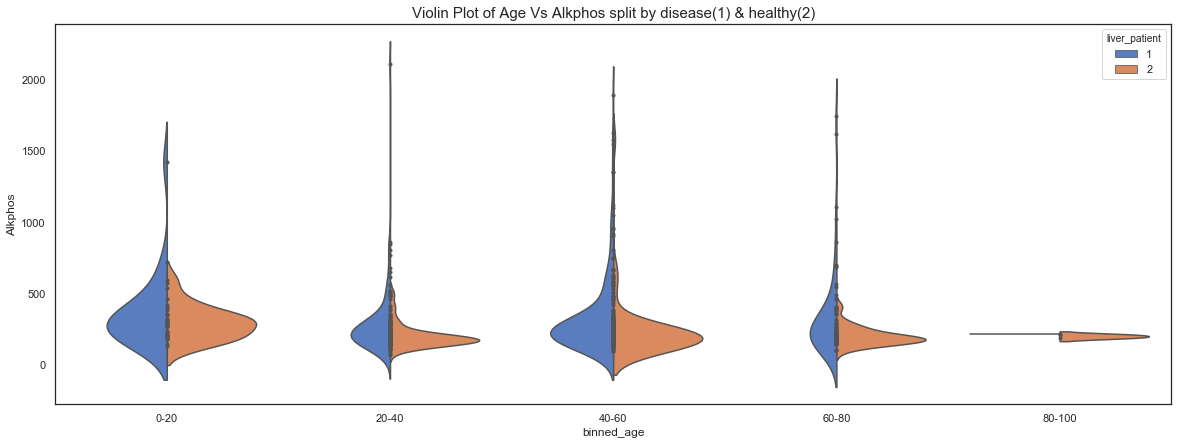

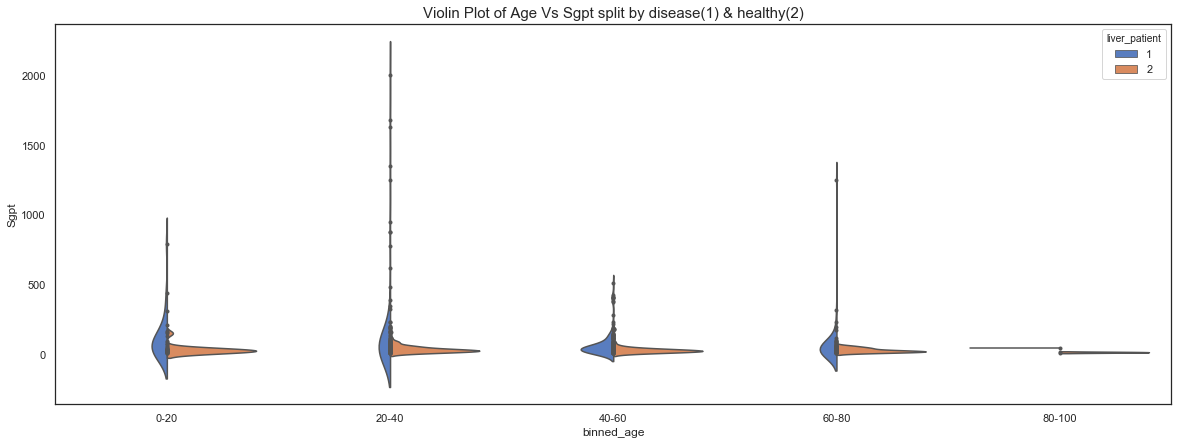

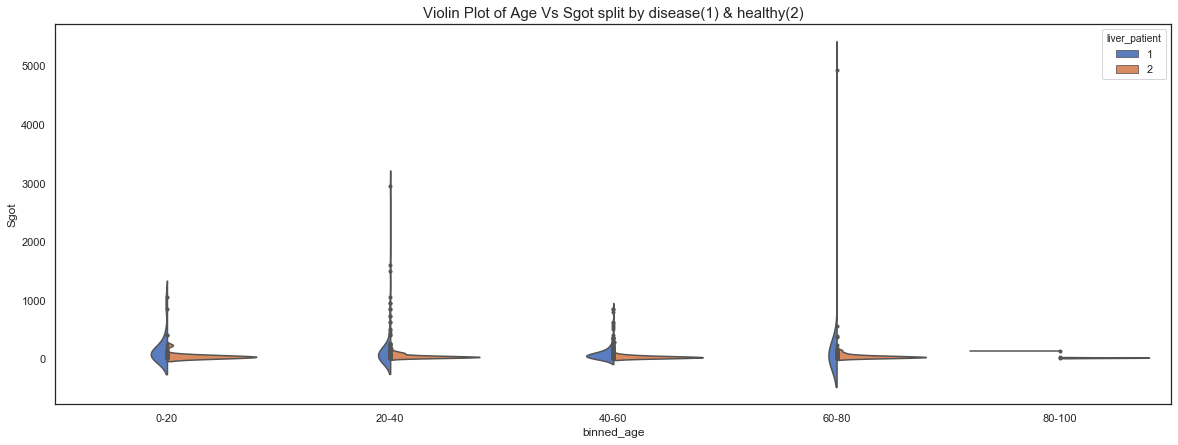

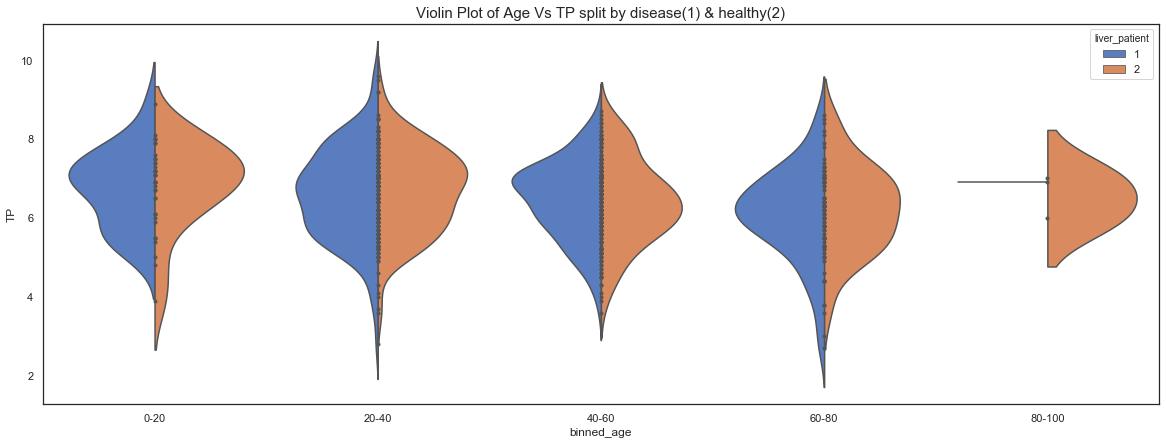

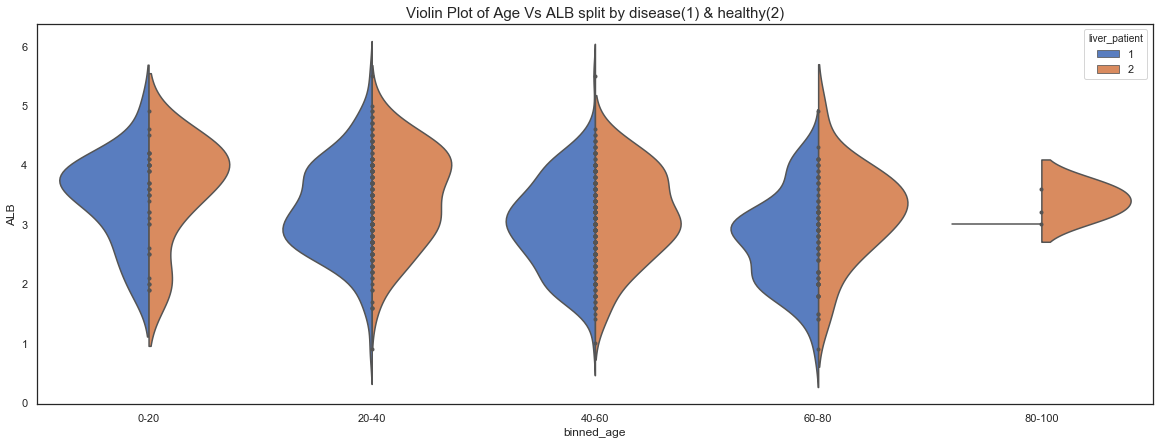

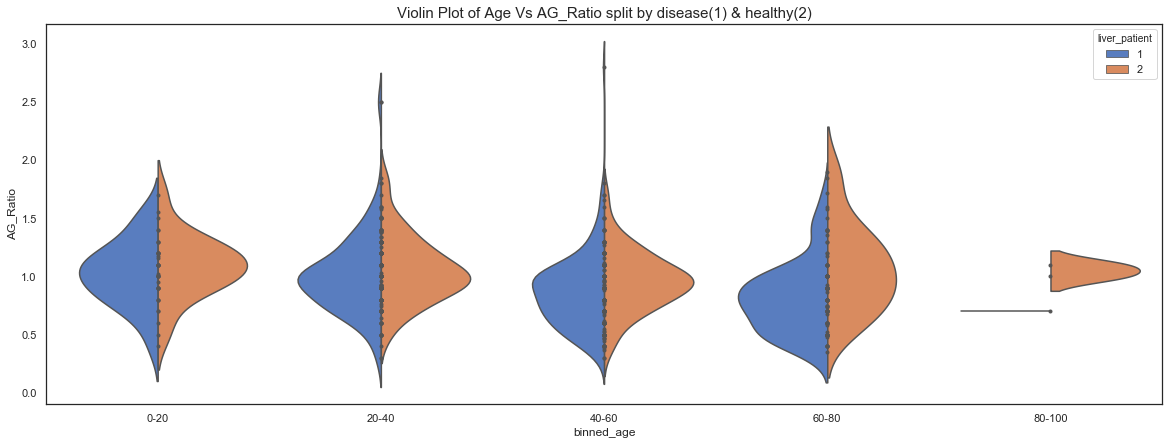

In [27]:
## plotting violin plots
violin_columns = ['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']

for v in violin_columns:
    plt.figure(figsize=(20, 7))
    g = sns.violinplot(x='binned_age', y=v, hue='liver_patient', data=liverDataFilledWithMedian, palette="muted", 
                       split=True, inner='point')
    g.set_title(f'Violin Plot of Age Vs {v} split by disease(1) & healthy(2)', fontsize=15)

### Question 3 - Log Normal (15 points)

Consider Y1 ~ LogNormal(0,0.25) (recall that μ and σ are the mean and std of the underlying normal distribution)  and Y2 ~ LogNormal(0,1).

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

#### 3.B
What is E(Y1)? E(Y2)?

#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

#### 3.E
What is the IQR of Y1? Of Y2?

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?